#### **Attention Mechanisms for Text Generation**

**Q)** Why is attention mechanism needed? \
**Ans)** To address the ambiguity in text.

<br>

For instance, consider the following sentence - \
_'The monkey ate the banana because it was too hungry'_ \
\
Here, what does the word '`it`' refer to? 


The attention mechanism in transformers assigns importance to words within a sentence. \
It ensures that the machine's interpretation aligns with human understanding.

For the example _'The monkey ate the banana because it was too hungry'_, \
the transformer model would assign the importance to each word in the following manner -

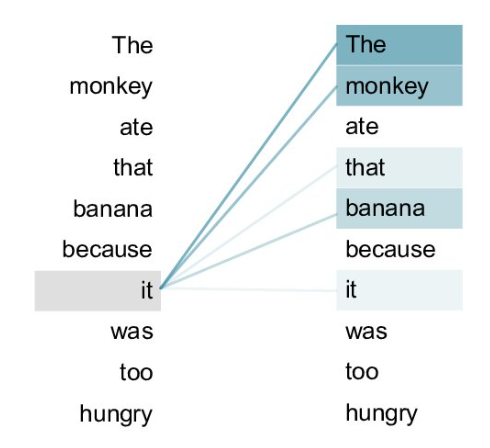



#### **Self and Multi-Head Attention**

- Self-Attention assigns significance to words within a sentence.
  - For e.g., In the sentence _'`The cat, which was on the roof, was scared`'_, \
The mechanism would link _'`was scared`'_ to _'`The cat`'_

- Multi-Head Attention is similar to having multiple spotlights, each capturing different facets.
  - For e.g., In the sentence _'`The cat, which was on the roof, was scared`'_, \
  _'`The cat`'_, _'`the roof`'_, _'`was on`'_?

#### **Attention Mechanism - setting vocabulary and data**

In [4]:
import torch
from torch import nn

data = ['the cat sat on the mat', 'the cat, which was on the roof, was scared']
vocab = set(' '.join(data).split())
word_to_idx = {word:i for i, word in enumerate(vocab)}
idx_to_word = {i:word for word, i in word_to_idx.items()}

pairs = [sentence.split() for sentence in data]
input_data = [[word_to_idx[word] for word in sentence[:-1]] for sentence in pairs]
target_data = [word_to_idx[sentence[-1]] for sentence in pairs]
inputs = [torch.tensor(seq, dtype=torch.long) for seq in input_data]
targets = torch.tensor(target_data, dtype=torch.long)

#### **Model Definition**

In [6]:
embedding_dim = 10
hidden_dim = 16

class RNNwithAttentionModel(nn.Module):
    def __init__(self):
        super(RNNwithAttentionModel, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, vocab_size)
    
    def forward(self, x):
        x = self.embeddings(x)
        out, _ = self.rnn(x)
        attn_weights = torch.nn.functional.softmax(self.attention(out).squeeze(2), dim=1)
        context = torch.sum(attn_weights.unsqueeze(2)*out, dim=1)
        out = self.fc(context)
        return out


def pad_sequences(batch):
    max_length = max([len(seq) for seq in batch])
    return torch.stack([torch.cat([seq, torch.zeros(max_length-len(seq)).long()]) for seq in batch])

In [ ]:
# training 

criterion = nn.CrossEntropyLoss()
attention_model = RNNwithAttentionModel()
optimizer = torch.optim.Adam(attention_model.parameters(), lr=0.01)

for epoch in range(300):
    attention_model.train()
    optimizer.zero_grad()
    padded_inputs = pad_sequences(inputs)
    outputs = attention_model(padded_inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

In [ ]:
# evaluation

for input_seq, target in zip(input_data, target_data):
    input_test = torch.tensor(input_seq, dtype=torch.long).unsqueeze(0)
    attention_model.eval()
    attention_output = attention_model(input_test)
    attention_prediction = idx_to_word[torch.argmax(attention_output).item()]
    
    print(f'\nInput: {' '.join([idx_to_word[idx] for idx in input_seq])}')
    print(f'Target: {idx_to_word[target]}')
    print(f'RNN with Attention prediction: {attention_prediction}')